In [2]:
my_npk <- data.frame(npk) #creation of data.frame
my_npk
is.factor(my_npk$N)
table(my_npk$N) #groups by factor N
lapply(list(yield ~ N, data=my_npk), summary) #descriptive statistics 
tapply(my_npk$yield, my_npk$N, summary) #descriptive statistics by groups

,block,N,P,K,yield
,<fct>,<fct>,<fct>,<fct>,<dbl>
1,1,0,1,1,49.5
2,1,1,1,0,62.8
3,1,0,0,0,46.8
4,1,1,0,1,57.0
5,2,1,0,0,59.8
6,2,1,1,1,58.5
7,2,0,0,1,55.5
8,2,0,1,0,56.0
9,3,0,1,0,62.8


[1] TRUE


 0  1 
12 12 

[[1]]
 Length   Class    Mode 
      3 formula    call 

$data
 block N      P      K          yield      
 1:4   0:12   0:12   0:12   Min.   :44.20  
 2:4   1:12   1:12   1:12   1st Qu.:49.73  
 3:4                        Median :55.65  
 4:4                        Mean   :54.88  
 5:4                        3rd Qu.:58.62  
 6:4                        Max.   :69.50  


$`0`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  44.20   48.30   52.35   52.07   55.62   62.80 

$`1`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  48.80   54.85   57.85   57.68   60.35   69.50 


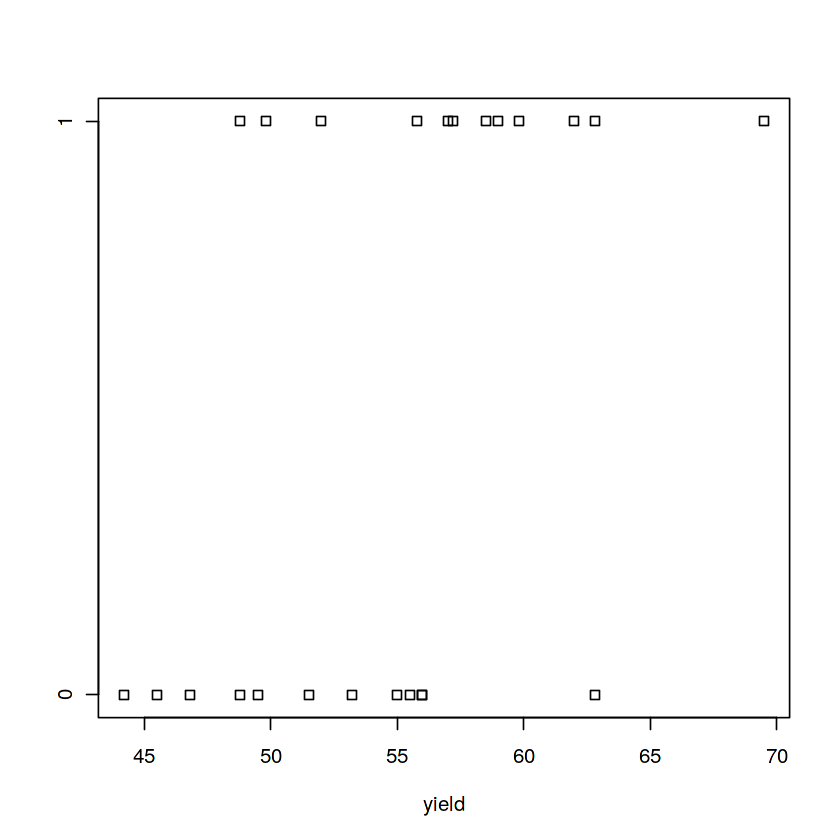

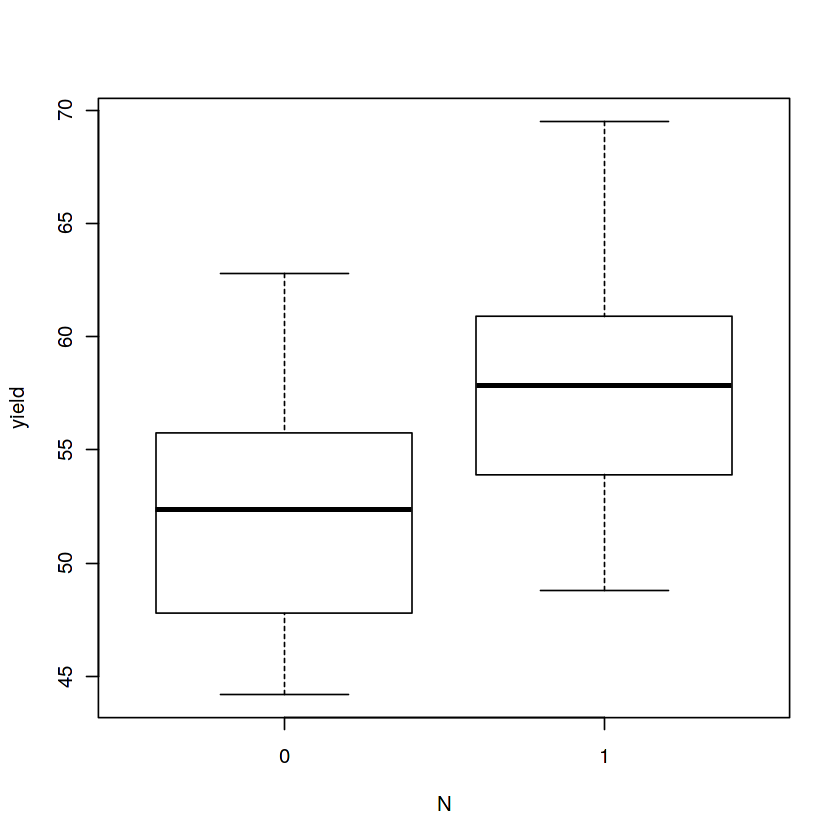

In [3]:
stripchart(yield ~ N, data=my_npk)          
plot(yield ~ N, data=my_npk) 

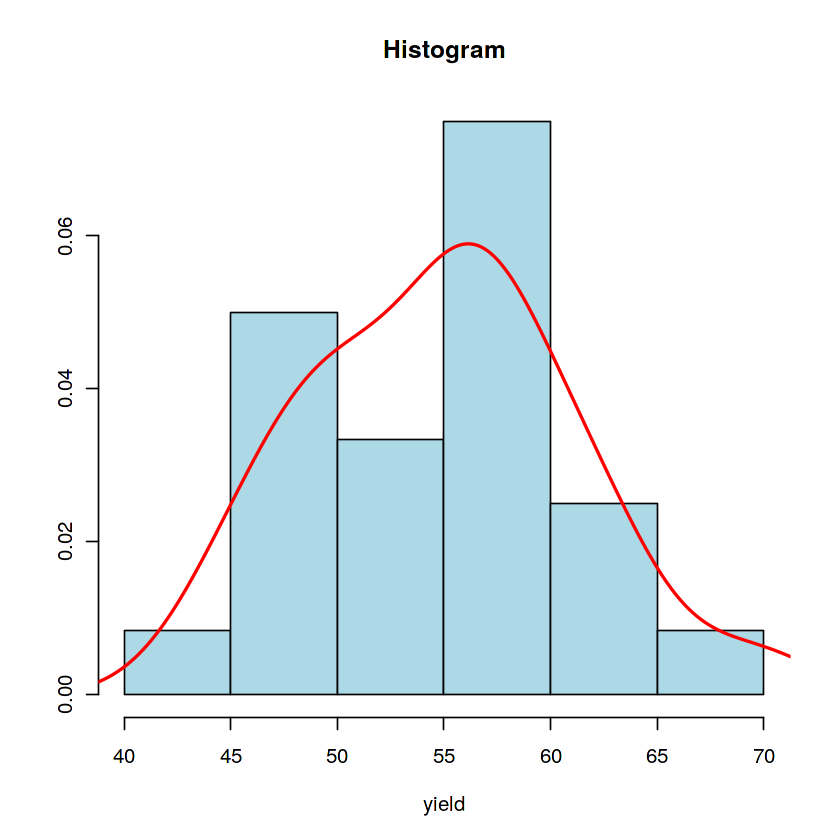

In [4]:
hist(my_npk$yield, breaks=6, freq=FALSE, col="lightblue", xlab="yield", ylab="", main="Histogram")
lines(density(my_npk$yield), col="red", lwd=2)

The following objects are masked from my_npk (pos = 3):

    block, K, N, P, yield



The following objects are masked from my_npk (pos = 5):

    block, K, N, P, yield



The following objects are masked from my_npk (pos = 7):

    block, K, N, P, yield



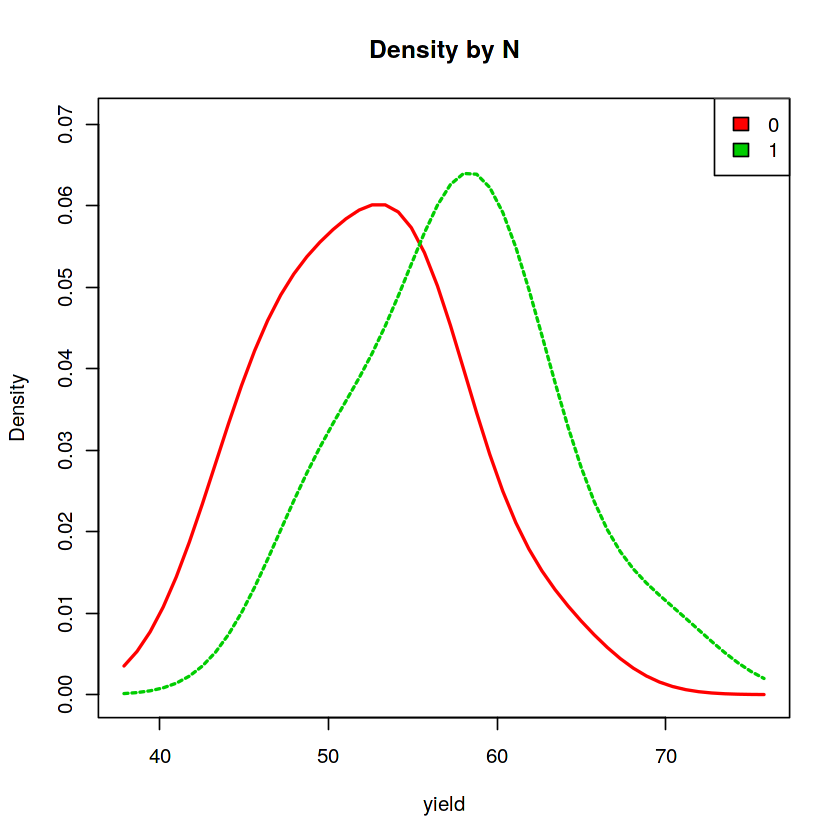

In [8]:
library("sm")
attach(my_npk)
sm.density.compare(yield, N, lwd=2, xlab="yield")
title(main="Density by N")
legend("topright", levels(N), fill=c(2:5))

In [9]:
shapiro.test(my_npk$yield)
bartlett.test(yield ~ N, data=my_npk)


	Shapiro-Wilk normality test

data:  my_npk$yield
W = 0.97884, p-value = 0.8735



	Bartlett test of homogeneity of variances

data:  yield by N
Bartlett's K-squared = 0.057652, df = 1, p-value = 0.8102


In [10]:
summary(aov(yield ~ N, data=my_npk)) #aov()
summary(lm(yield ~ N, data=my_npk)) #linear model 

            Df Sum Sq Mean Sq F value Pr(>F)  
N            1  189.3  189.28   6.061 0.0221 *
Residuals   22  687.1   31.23                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Call:
lm(formula = yield ~ N, data = my_npk)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.8833 -3.7667  0.1667  3.5583 11.8167 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   52.067      1.613  32.274   <2e-16 ***
N1             5.617      2.281   2.462   0.0221 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.588 on 22 degrees of freedom
Multiple R-squared:  0.216,	Adjusted R-squared:  0.1803 
F-statistic: 6.061 on 1 and 22 DF,  p-value: 0.02213


In [11]:
oneway.test(yield ~ N, data=my_npk)
kruskal.test(yield ~ N, data=my_npk)


	One-way analysis of means (not assuming equal variances)

data:  yield and N
F = 6.0607, num df = 1.00, denom df = 21.88, p-value = 0.02218



	Kruskal-Wallis rank sum test

data:  yield by N
Kruskal-Wallis chi-squared = 5.6107, df = 1, p-value = 0.01785


In [12]:
summary(my_npk)
lapply(list(yield ~ block + N*P*K, data=my_npk), summary)

 block N      P      K          yield      
 1:4   0:12   0:12   0:12   Min.   :44.20  
 2:4   1:12   1:12   1:12   1st Qu.:49.73  
 3:4                        Median :55.65  
 4:4                        Mean   :54.88  
 5:4                        3rd Qu.:58.62  
 6:4                        Max.   :69.50  

[[1]]
 Length   Class    Mode 
      3 formula    call 

$data
 block N      P      K          yield      
 1:4   0:12   0:12   0:12   Min.   :44.20  
 2:4   1:12   1:12   1:12   1st Qu.:49.73  
 3:4                        Median :55.65  
 4:4                        Mean   :54.88  
 5:4                        3rd Qu.:58.62  
 6:4                        Max.   :69.50  


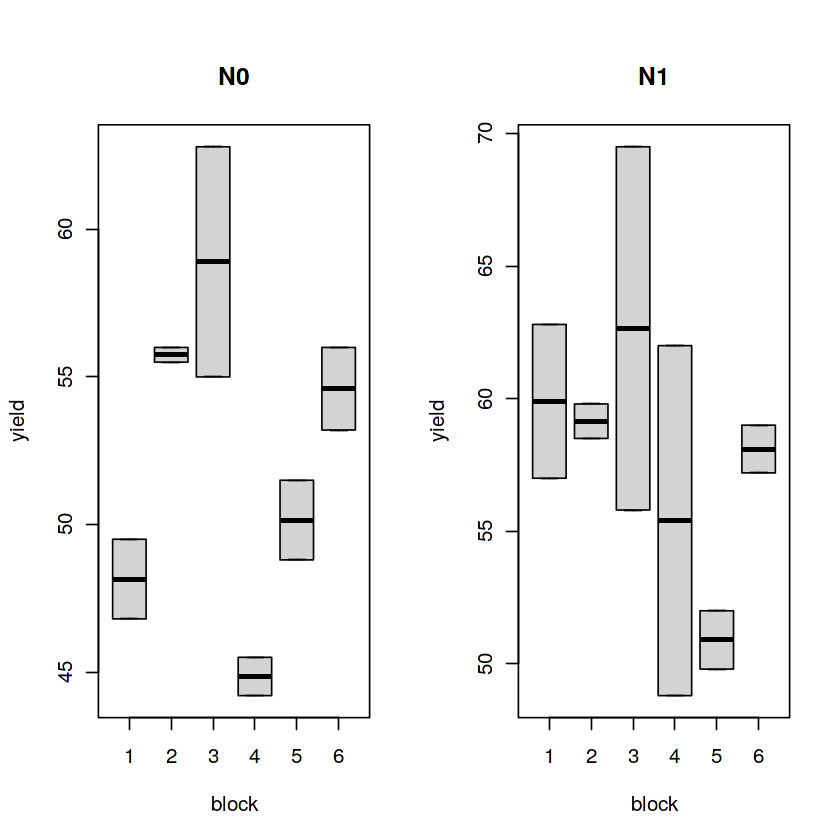

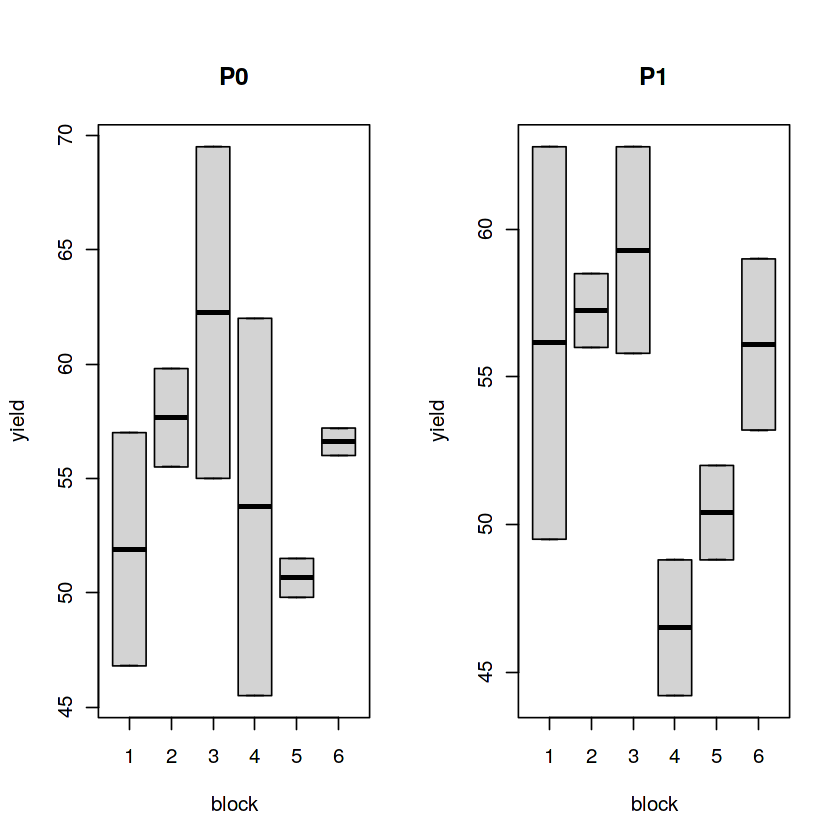

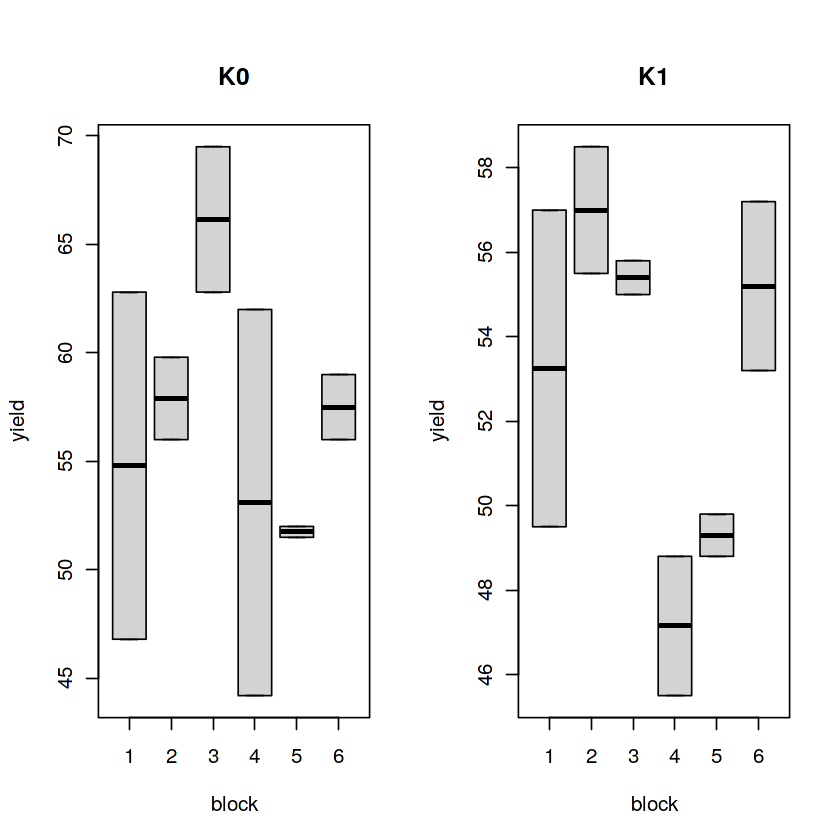

In [14]:
opar <- par(mfrow = c(1, 2), oma = c(0, 0, 1.1, 0))
plot(yield ~ block, data=my_npk, col="lightgray", varwidth=TRUE, subset=N=="0", main="N0")
plot(yield ~ block, data=my_npk, col="lightgray", varwidth=TRUE, subset=N=="1", main="N1")
par(opar)

opar <- par(mfrow = c(1, 2), oma = c(0, 0, 1.1, 0))
plot(yield ~ block, data=my_npk, col="lightgray", varwidth=TRUE, subset=P=="0", main="P0")
plot(yield ~ block, data=my_npk, col="lightgray", varwidth=TRUE, subset=P=="1", main="P1")
par(opar)

opar <- par(mfrow = c(1, 2), oma = c(0, 0, 1.1, 0))
plot(yield ~ block, data=my_npk, col="lightgray", varwidth=TRUE, subset=K=="0", main="K0")
plot(yield ~ block, data=my_npk, col="lightgray", varwidth=TRUE, subset=K=="1", main="K1")
par(opar)

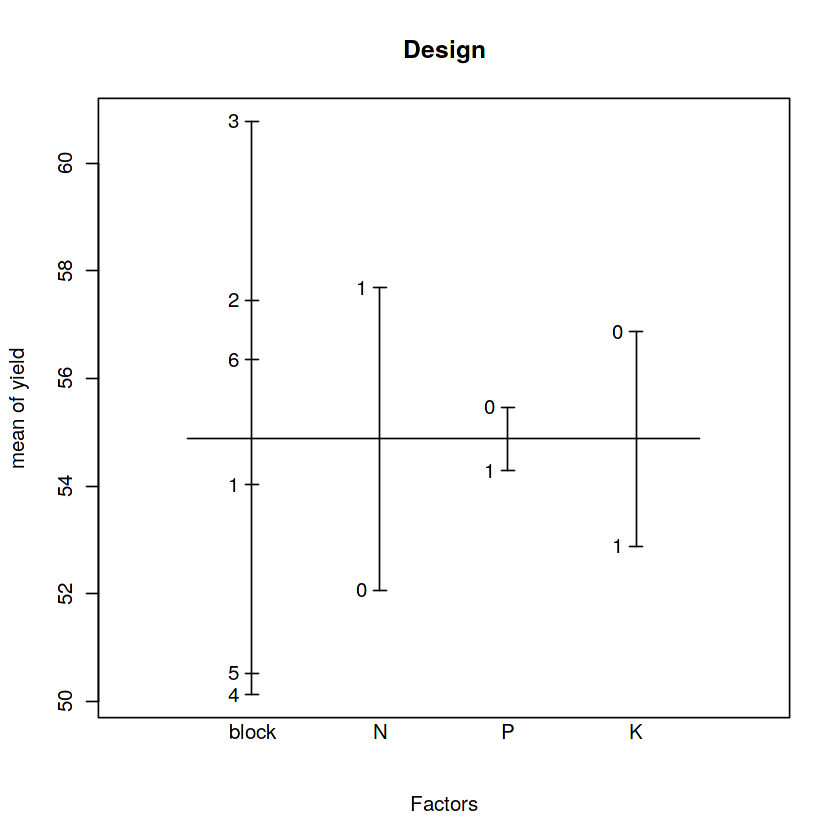

In [15]:
plot.design(my_npk, main="Design")

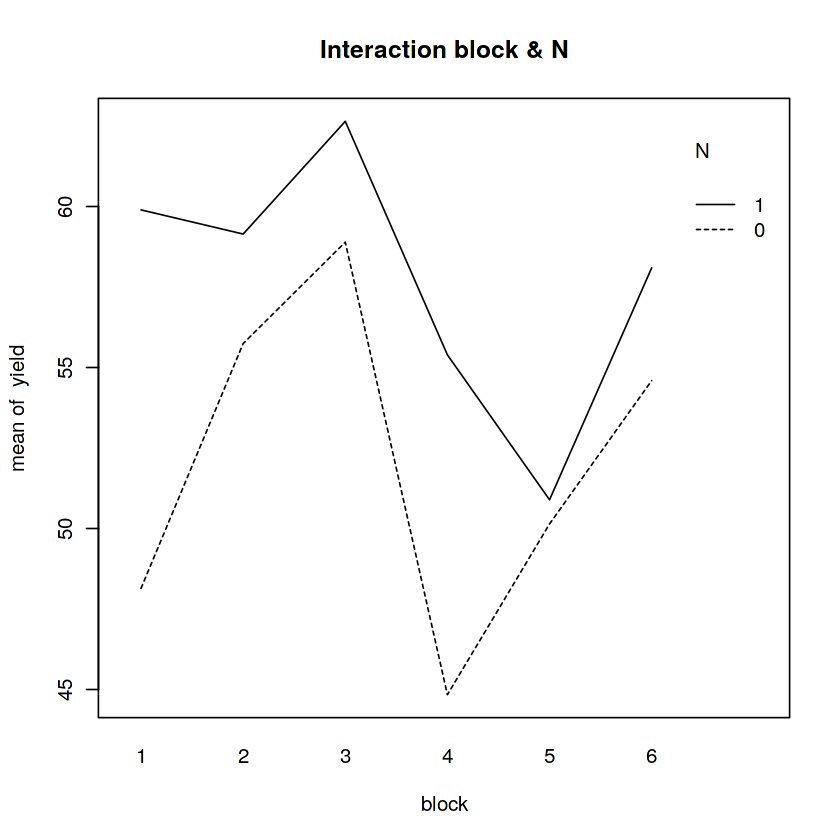

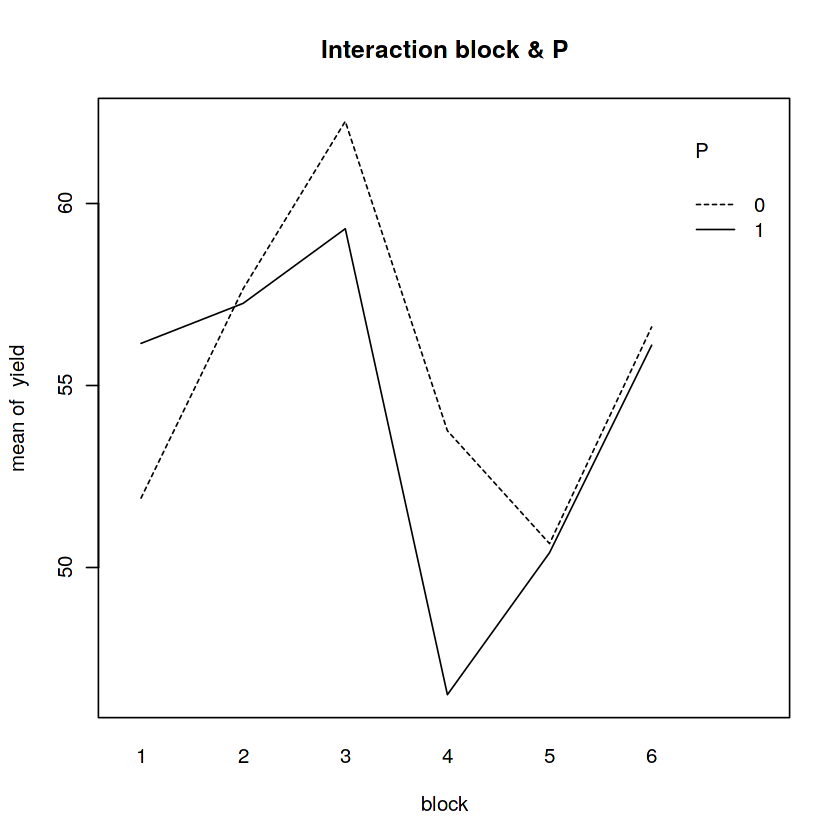

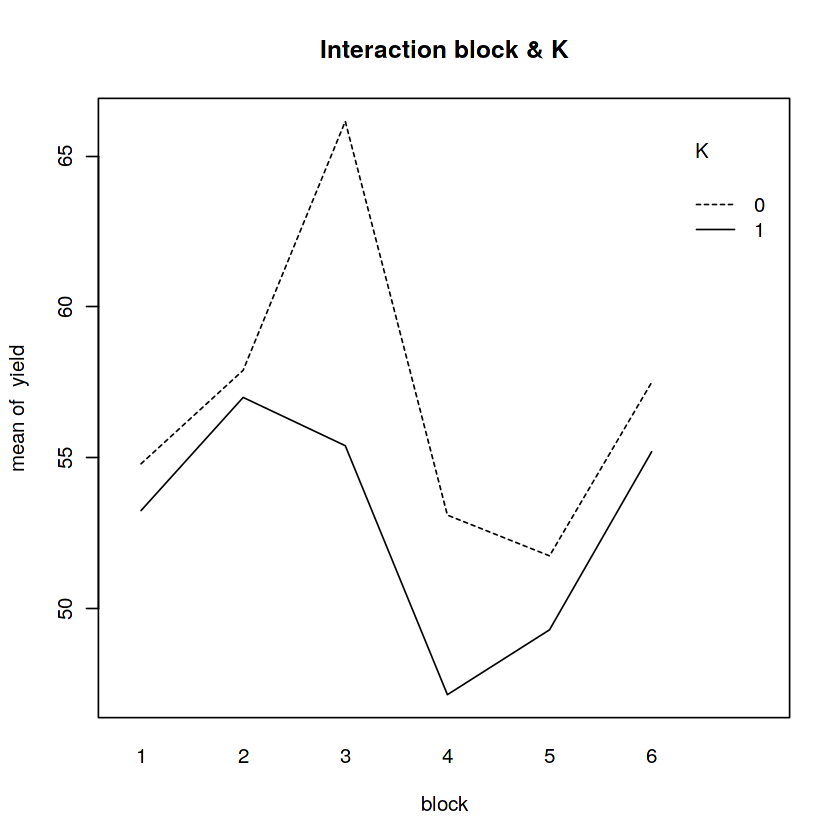

In [16]:
with(my_npk, interaction.plot(x.factor=block, trace.factor=N, response=yield, main="Interaction block & N"))
with(my_npk, interaction.plot(x.factor=block, trace.factor=P, response=yield, main="Interaction block & P"))
with(my_npk, interaction.plot(x.factor=block, trace.factor=K, response=yield, main="Interaction block & K"))


The following objects are masked from my_npk (pos = 3):

    block, K, N, P, yield



The following objects are masked from my_npk (pos = 4):

    block, K, N, P, yield



The following objects are masked from my_npk (pos = 6):

    block, K, N, P, yield



The following objects are masked from my_npk (pos = 8):

    block, K, N, P, yield



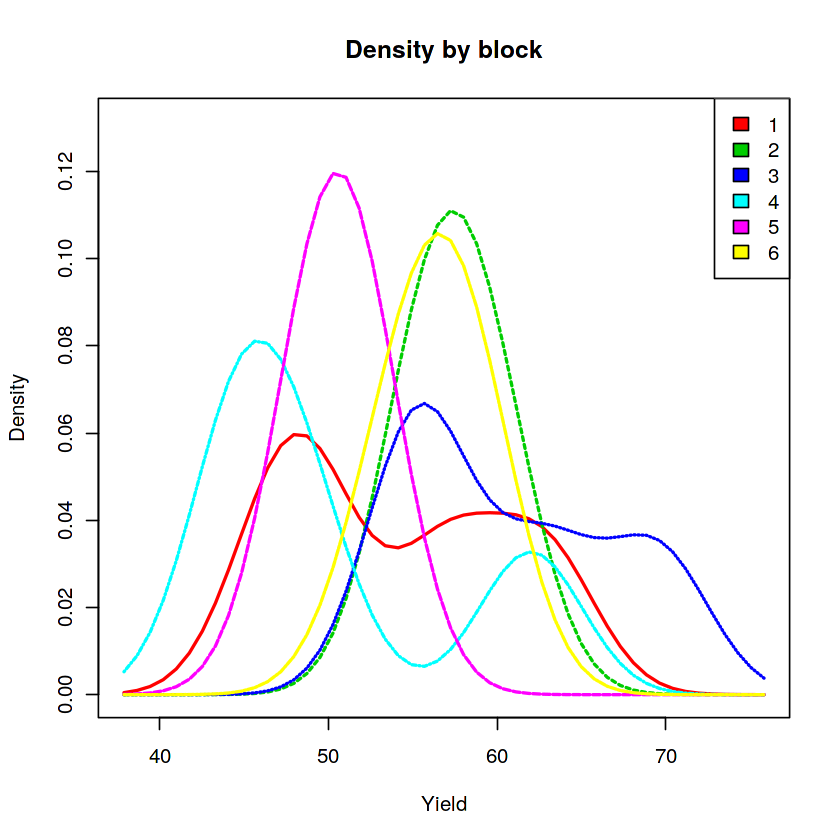

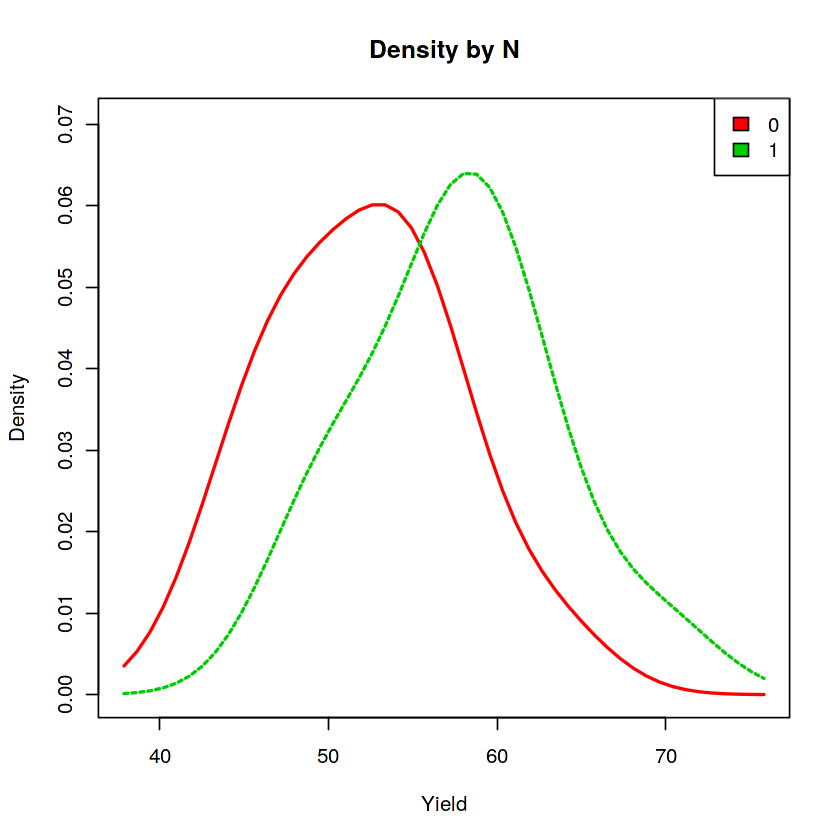

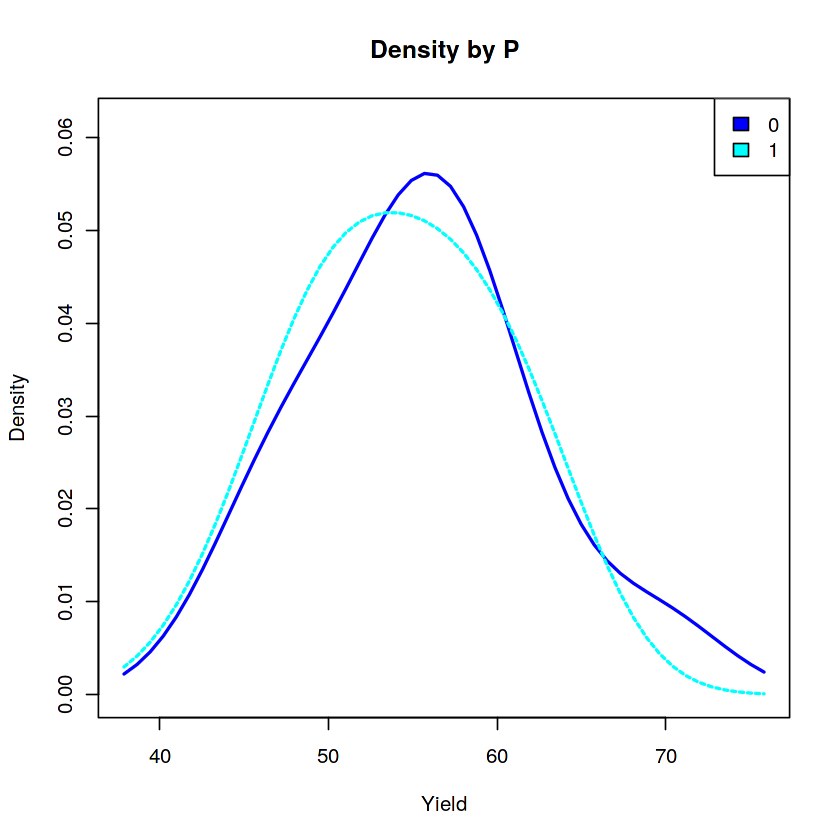

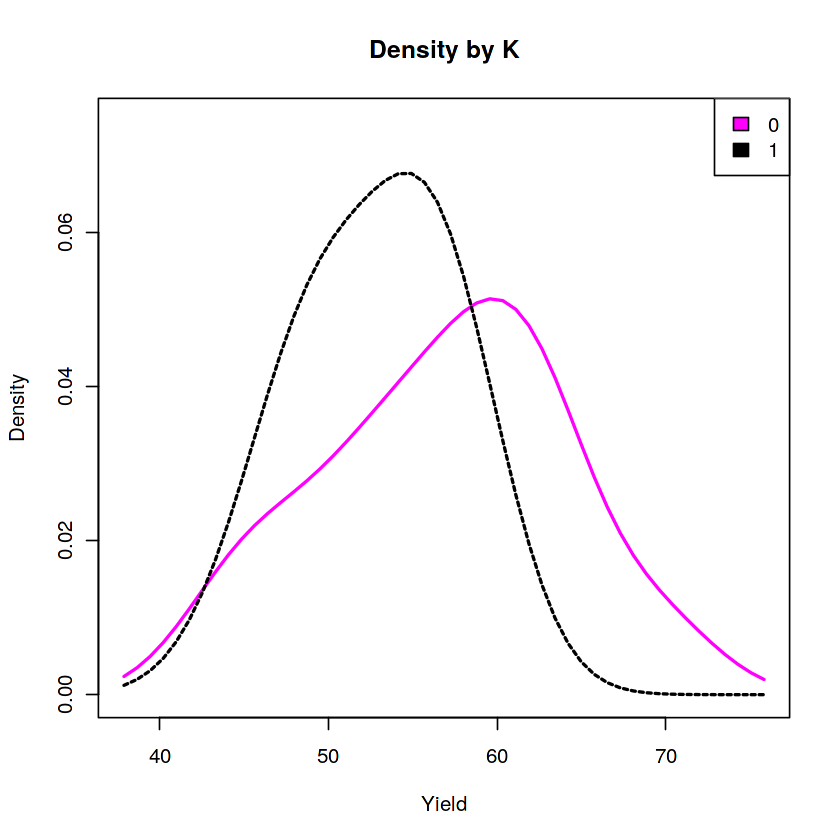

In [17]:
attach(my_npk)
sm.density.compare(yield, block, lwd=2, xlab="Yield")
title(main="Density by block")
legend("topright", levels(block), fill=c(2:7))

sm.density.compare(yield, N, lwd=2, xlab="Yield")
title(main="Density by N")
legend("topright", levels(N), fill=c(2:3))

sm.density.compare(yield, P, lwd=2, col=c(4:5), xlab="Yield")
title(main="Density by P")
legend("topright", levels(P), fill=c(4:5))

sm.density.compare(yield, K, lwd=2, col=c(6,9), xlab="Yield")
title(main="Density by K")
legend("topright", levels(K), fill=c(6,9))


In [18]:
#statistics
#means by block groups
MeansB <- tapply(my_npk$yield, my_npk$block, mean) 
MeansB

#means by N groups
MeansN <- tapply(my_npk$yield, my_npk$N, mean) 
MeansN

#means by P groups
MeansP <- tapply(my_npk$yield, my_npk$P, mean) 
MeansP

#means by K groups
MeansK <- tapply(my_npk$yield, my_npk$K, mean) 
MeansK

1      2      3      4      5      6 
54.025 57.450 60.775 50.125 50.525 56.350

0        1 
52.06667 57.68333

0        1 
55.46667 54.28333

0        1 
56.86667 52.88333

In [22]:
require(doBy)            # note the difference!

summaryBy(yield ~ block + N, data=my_npk, FUN = c(mean, sd, length))          
summaryBy(yield ~ block + P, data=my_npk, FUN = c(mean, sd, length)) 
summaryBy(yield ~ block + K, data=my_npk, FUN = c(mean, sd, length)) 


Loading required package: doBy


,block,N,yield.mean,yield.sd,yield.length
,<fct>,<fct>,<dbl>,<dbl>,<dbl>
1,1,0,48.15,1.9091883,2
2,1,1,59.90,4.1012193,2
3,2,0,55.75,0.3535534,2
4,2,1,59.15,0.9192388,2
5,3,0,58.90,5.5154329,2
6,3,1,62.65,9.6873629,2
7,4,0,44.85,0.9192388,2
8,4,1,55.40,9.3338095,2
9,5,0,50.15,1.9091883,2


,block,P,yield.mean,yield.sd,yield.length
,<fct>,<fct>,<dbl>,<dbl>,<dbl>
1,1,0,51.90,7.2124892,2
2,1,1,56.15,9.4045202,2
3,2,0,57.65,3.0405592,2
4,2,1,57.25,1.7677670,2
5,3,0,62.25,10.2530483,2
6,3,1,59.30,4.9497475,2
7,4,0,53.75,11.6672619,2
8,4,1,46.50,3.2526912,2
9,5,0,50.65,1.2020815,2


,block,K,yield.mean,yield.sd,yield.length
,<fct>,<fct>,<dbl>,<dbl>,<dbl>
1,1,0,54.80,11.3137085,2
2,1,1,53.25,5.3033009,2
3,2,0,57.90,2.6870058,2
4,2,1,57.00,2.1213203,2
5,3,0,66.15,4.7376154,2
6,3,1,55.40,0.5656854,2
7,4,0,53.10,12.5865007,2
8,4,1,47.15,2.3334524,2
9,5,0,51.75,0.3535534,2


In [23]:
bartlett.test(yield ~ block, data=my_npk)
bartlett.test(yield ~ N, data=my_npk)
bartlett.test(yield ~ P, data=my_npk)
bartlett.test(yield ~ K, data=my_npk)


	Bartlett test of homogeneity of variances

data:  yield by block
Bartlett's K-squared = 11.508, df = 5, p-value = 0.04219



	Bartlett test of homogeneity of variances

data:  yield by N
Bartlett's K-squared = 0.057652, df = 1, p-value = 0.8102



	Bartlett test of homogeneity of variances

data:  yield by P
Bartlett's K-squared = 0.1555, df = 1, p-value = 0.6933



	Bartlett test of homogeneity of variances

data:  yield by K
Bartlett's K-squared = 3.0059, df = 1, p-value = 0.08296


            Df Sum Sq Mean Sq F value  Pr(>F)   
block        5  343.3   68.66   4.447 0.01594 * 
N            1  189.3  189.28  12.259 0.00437 **
P            1    8.4    8.40   0.544 0.47490   
K            1   95.2   95.20   6.166 0.02880 * 
N:P          1   21.3   21.28   1.378 0.26317   
N:K          1   33.1   33.14   2.146 0.16865   
P:K          1    0.5    0.48   0.031 0.86275   
Residuals   12  185.3   15.44                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

,(Intercept),block2,block3,block4,block5,block6,N1,P1,K1,N1:P1,N1:K1,P1:K1,N1:P1:K1
1,1,0,0,0,0,0,0,1,1,0,0,1,0
2,1,0,0,0,0,0,1,1,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,1,0,1,0,0
5,1,1,0,0,0,0,1,0,0,0,0,0,0
6,1,1,0,0,0,0,1,1,1,1,1,1,1
7,1,1,0,0,0,0,0,0,1,0,0,0,0
8,1,1,0,0,0,0,0,1,0,0,0,0,0
9,1,0,1,0,0,0,0,1,0,0,0,0,0
10,1,0,1,0,0,0,1,1,1,1,1,1,1


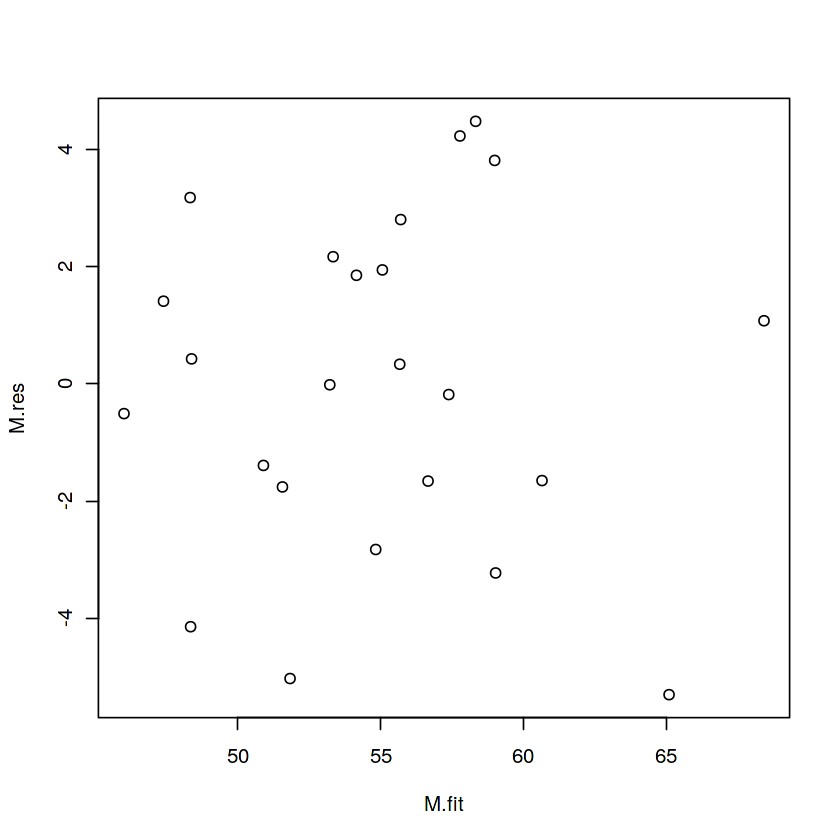

In [25]:
options(contrasts = c("contr.treatment", "contr.poly"))
npk.aov <- aov(yield ~ block + N*P*K, data=my_npk)
summary(npk.aov)

model.matrix(npk.aov)
M.res <- npk.aov$residuals
M.fit <- npk.aov$fitted.values
plot(M.fit, M.res)

In [26]:
summary(lmnpk <- lm(yield ~ block + N*P*K, data=my_npk))
anova(lmnpk)


Call:
lm(formula = yield ~ block + N * P * K, data = my_npk)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.3000 -1.6833  0.1583  1.9979  4.4750 

Coefficients: (1 not defined because of singularities)
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  51.8250     2.7785  18.652 3.15e-10 ***
block2        3.4250     2.7785   1.233  0.24131    
block3        6.7500     2.7785   2.429  0.03177 *  
block4       -3.9000     2.7785  -1.404  0.18578    
block5       -3.5000     2.7785  -1.260  0.23174    
block6        2.3250     2.7785   0.837  0.41907    
N1            9.8500     2.7785   3.545  0.00403 ** 
P1            0.4167     2.7785   0.150  0.88329    
K1           -1.9167     2.7785  -0.690  0.50344    
N1:P1        -3.7667     3.2084  -1.174  0.26317    
N1:K1        -4.7000     3.2084  -1.465  0.16865    
P1:K1         0.5667     3.2084   0.177  0.86275    
N1:P1:K1          NA         NA      NA       NA    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
block,5,343.2950000,68.6590000,4.44666643,0.015938790
N,1,189.2816667,189.2816667,12.25873421,0.004371812
P,1,8.4016667,8.4016667,0.54412982,0.474904093
K,1,95.2016667,95.2016667,6.16568920,0.028795054
N:P,1,21.2816667,21.2816667,1.37829669,0.263165283
N:K,1,33.1350000,33.1350000,2.14597201,0.168647879
P:K,1,0.4816667,0.4816667,0.03119491,0.862752086
Residuals,12,185.2866667,15.4405556,NA,NA


In [27]:
kruskal.test(yield ~ block, data=my_npk)
kruskal.test(yield ~ N, data=my_npk)
kruskal.test(yield ~ P, data=my_npk)
kruskal.test(yield ~ K, data=my_npk)


	Kruskal-Wallis rank sum test

data:  yield by block
Kruskal-Wallis chi-squared = 8.3684, df = 5, p-value = 0.1371



	Kruskal-Wallis rank sum test

data:  yield by N
Kruskal-Wallis chi-squared = 5.6107, df = 1, p-value = 0.01785



	Kruskal-Wallis rank sum test

data:  yield by P
Kruskal-Wallis chi-squared = 0.10097, df = 1, p-value = 0.7507



	Kruskal-Wallis rank sum test

data:  yield by K
Kruskal-Wallis chi-squared = 2.807, df = 1, p-value = 0.09385
